# Lecture 24: Introduction to Machine Learning

CSCI 1360: Foundations for Informatics and Analytics

## Overview and Objectives

We've covered statistics, probability, linear algebra, data munging, and the basics of Python. You're ready. By the end of this lecture, you should be able to

 - Define machine learning, optimization, and artificial intelligence, and how these subfields interact.
 - Understand when to use supervised versus unsupervised learning.
 - Create a basic classifier.

## Part 1: Machine Learning

What, exactly, is machine learning?

From Arthur Samuel in 1959: Machine Learning is a

> "...Field of study that gives computers the ability to learn without being explicitly programmed."

Probably the most succinct definition.

Imagine how you first learned what a "cat" was when you were young. The process probably went something like this:

 - You pointed at a cat and asked "What is that?"

 - Somebody (probably a parent) said "That's a cat."

 - You internalized this experience. Perhaps later, you pointed at a dog and asked "Cat?"

 - Somebody (again, probably a parent) corrected you, saying "No, that's a dog."

 - With some more back and forth, you were able to reliably determine on your own whether or not something in the real world was a cat.

The first process, in which you asked for and received feedback, is the *learning* step.

The second process, in which you took your experience and identified cats without any feedback, is the *generalization* step.

**These two steps define a machine learning algorithm.**

Some other ways of describing machine learning include

 - Inferring knowledge from data
 - Generalizing to unseen or unobserved data
 - Emphasizing the computational challenges (e.g., "big" data)

There's a whole ecosystem of buzzwords around machine learning; we'll only explore a very small subset in this lecture.

![mlecosystem](http://cs.uga.edu/~squinn/courses/su16/csci1360e/assets/mlecosystem.jpg)

Most machine learning algorithms involve the development of a *rule* to describe the data.

This rule is sometimes referred to as a *hypothesis* or a *decision boundary*.

![decisionboundary](http://www.mblondel.org/images/perceptron_linear.png)

The way in which this rule is formed, and the resulting shape of the decision boundary, is largely what distinguishes one machine learning algorithm from another.

Choosing what algorithm to use is important.

 - Different algorithms embody and quantify different assumptions about the underlying data.

 - A prevalent heuristic throughout machine learning is to use the simplest possible model or algorithm that adequately explains the data.

 - Using extremely complex algorithms will almost always give you lower error rates, but this can potentially lead to *overfitting*: a situation where your algorithm so closely matches the data that it can't generalize to new data.

**Overfitting** is a problem in machine learning where your model performs exceptionally well on your training data, but fits so tightly to it that it cannot generalize well to new data.

Typically, when you build a machine learning pipeline, you separate your data into [at least] two subsets:

 - *Training data*, which you use to construct your machine learning model. If you are building a classifier, this will also contain the data to which you know what "class" it belongs (e.g. if you're building a spam detector, your training data will include emails for which you know whether or not they are spam)

 - *Testing data*, which you will use to test the model constructed in the training step. This data may or may not also have "class" labels; if so, it serves to simulate how your model would perform in the "real world." 

**Evaluating your model is crucial to good model design.** Performing this training-testing split is one step to avoid the problems of overfitting, whereby your model tunes itself so tightly to training data that it cannot generalize to any new information.

This can be mitigated through the use of *k-fold cross-validation*.

![xval](http://i.stack.imgur.com/YWgro.gif)

Cross-validation is a process through which the data you use to train your model is split into two sets, or *folds*: *training* and *testing*. The model is trained using the training set, and then is tested for generalization accuracy with the testing set.

This process is then repeated with new training and testing sets. The number of times this process is repeated is the number $k$ in **k**-fold.

Another important problem to keep in mind when designing your algorithms is the concept of the **bias-variance tradeoff**.

 - **Variance** is a concept we've seen before; it's related directly to the standard deviation. This quantifies how much a distribution varies from its mean, or average. Small variance means a distribution is concentrated around its mean; large variance means the distribution is very spread out.

 - **Bias** is a term we've all heard as a colloquialism, but which has a very specific statistical definition: this quantifies the difference between the expected mean of a random variable, and the true mean of that random variable.

In statistical terms, neither of these quantities is inherently "bad"; this is especially true with bias, as in daily language use the term tends to be a pejorative. However, it is critical to understand the effects these quantities can have on any modeling strategy you employ in machine learning.

This picture perfectly describes the effects of the two quantities:

![biasvariance](http://blog.fliptop.com/wp-content/uploads/2015/01/Bias_Variance.jpg)

In an ideal world, we'd all build machine learning models with **low variance and low bias** (upper left corner).

Unfortunately, this is rarely, if ever, possible. In fact, we can explicitly decompose the error rates of virtually any machine learning algorithm into three distinct components: the bias, the variance, and the irreducible error (noise in the problem itself).

The **tradeoff** comes from the fact that, as we try to *decrease* the error of one of the terms, we often simultaneously *increase* the error from the other term.

Different machine learning algorithms and models will make different assumptions and therefore give different preferences to bias versus variance. The specifics of the problem on which you are working will dictate whether your model can tolerate high-bias or high-variance.

## Part 2: Supervised and Unsupervised Learning

Learning algorithms can, at a coarse level, be divided into two distinct groups: *supervised* and *unsupervised* learning.

 - **Supervised learning** involves training a model using labeled data, or data for which you know the answer. For example, if you wanted to design an automatic spam filter, you might start with a training dataset containing sample emails that are labeled as either spam or not spam. This is the equivalent of your parent figure providing the correct answer regarding your inquiries about what is a "cat."

 - **Unsupervised learning** is the process of building a model using data for which you have no ground truth and no explicit set of labels for your data. Usually this implies *clustering*: the process of grouping similar things together.

### Supervised Learning

The basic idea behind supervised learning is that you start with a ground-truth, labeled dataset of $N$ points with the form

$\{(\vec{x}_1, y_1), (\vec{x}_2, y_2), ..., (\vec{x}_N, y_N)\}$

where $\vec{x}_i$ is the $i^{th}$ data point, and $y_i$ is the ground-truth label (e.g. "spam" or "not spam" for email) of that data point.

The goal, then, is to use this training data to learn a function $f$ that most accurately maps the training data $X$ to the correct labels $Y$. In mathematical parlance, this looks like

$f : X \rightarrow Y$

Within the branch of supervised learning, there are two distinct strategies: *classification* and *regression*.

 - **Classification** is the process of mapping an input data point $\vec{x}$ to a discrete label. Spam filters would fall in thsi category: we are explicitly trying to identify an incoming email as either "spam" or "not spam." In mathematical terms: we're mapping continuous input to one of a handful of discrete outputs.

 - **Regression** is the process of mapping an input data point $\vec{x}$ to a real-valued label. Linear regression, in which the goal is to find a best-fit line to a cloud of data points, is an example. Rather than a handful of possible discrete outputs, your output is instead a continuous floating-point value. An example of regression might be predicting the stock value of a company.

In both instances of supervised learning, we're still concerned with mapping inputs to certain correct outputs. The difference is the form of the output: discrete (one of a possible handful) for classification tasks, and continuous (real-valued; floating-point) for regression tasks.

### Unsupervised Learning

Unlike supervised learning, tasks in unsupervised learning deal strictly with unlabeled data of $N$ points of the form

$\{\vec{x}_1, \vec{x}_2, ..., \vec{x}_N\}$

Since all we have are the data, the goal of unsupervised learning is to find a model which best explains the underlying process that gave rise to the data.

One example of unsupervised learning is the identification of communities in social networks.

A social network is well-represented using the graph structure of nodes connected by edges, where each user (you and me) is a node in the graph, and any users who are "friends" are connected by an edge.

Community-finding is decidedly an unsupervised process: you have no idea how many communities there are ahead of time, nor do you know who is part of what community. All you have is your database of users and their connections.

We can use these inter-person connections to identify groups that are highly interconnected with each other, therefore representing a "community." A research paper in 2010 identified such networks of bloggers on different sides of the political spectrum:

![network](http://image.slidesharecdn.com/socialnetworkanalysisparti-120418082836-phpapp01/95/social-network-analysis-intro-part-i-12-728.jpg)

Other ways to refer to unsupervised learning include

 - **Clustering**, since we are effectively "clustering" similar data together

 - **Anomaly detection**, sort of an antonym for clustering: rather than having the goal of grouping similar things together, we use that as a stepping stone to then try and identify things that *don't* fit

 - **Data mining**, though this colloquialism has largely been co-opted by the popular media and may therefore not necessarily equate to unsupervised learning in certain contexts

In all cases, the common thread is that you don't have any kind of ground-truth labeling scheme.

## Part 3: Building a Classifier

Let's illustrate some of these concepts by building a classifier for a well-known dataset: the **Iris dataset.**

This dataset was one of the first available for statistical classification, dating back to the 1930s.

![iris](https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg/440px-Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg)

It involves recognizing [Iris flower species](https://en.wikipedia.org/wiki/Iris_(plant)) based on their physical characteristics. Today, these species would be identified using DNA, but in the 1930s DNA had not even been discovered.

The Iris dataset is comprised of 150 samples of Iris flowers over 3 species, or *classes* (Setosa, Versicolor, and Virginica).

Each sample has four attributes associated with it:

 - Sepal length
 - Sepal width
 - Petal length
 - Petal width

These attributes are our **features** to describe each sample, and what we'll use in order to **classify** each sample into one of the previous three categories.

Our classification challenge: **If we saw a new flower out in a field and measured its sepal and petal length and width, could we make a good prediction about its species?**

One reason the dataset is so popular is because it's small (150 data points) and easily visualized (4 dimensions), so we can easily take all possible 2-D combinations of the four features and plot them out to see about building some intuition for the data.

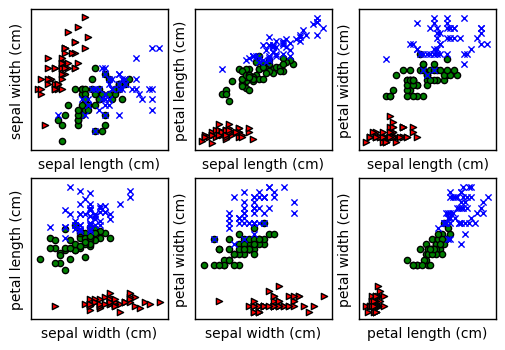

In [1]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as data

iris = data.load_iris()  # The dataset comes back as a dictionary.
features = iris['data']
feature_names = iris['feature_names']
classes = iris['target']
feature_combos = itertools.combinations([0, 1, 2, 3], 2)

for i, (x1, x2) in enumerate(feature_combos):
    fig = plt.subplot(2, 3, i + 1)
    fig.set_xticks([])
    fig.set_yticks([])
    for t, marker, c in zip(range(3), ">ox", "rgb"):
        plt.scatter(features[classes == t, x1],
                   features[classes == t, x2],
                   marker = marker, c = c)
    plt.xlabel(feature_names[x1])
    plt.ylabel(feature_names[x2])

This gives us some good intuition! For instance--

 - The first plot, sepal width vs sepal length, gives us a really good separation of the Setosa (red triangles) from the other two, but a poor separation between Versicolor and Virginica

 - In fact, this is a common theme across most of the subplots--we can easily pick two dimensions and get a good separation of Setosa from the others, but separating Versicolor and Virginica may be more difficult

 - The best pairings for separating Versicolor and Virginica may be either petal length vs sepal width, or petal width vs sepal width.

Still, for any given pair of features, we can't get a *perfect* classification rule.

**...but that's OK!**

Remember overfitting? Designing a classifier that obtains 100% accuracy on the data we have available may sound great, but what happens when *new* data arrive?

So! Using these pictures, can we design a very simple classifier?

![plots](iris.png)

In [2]:
sepal_length = 0
sepal_width = 1
petal_length = 2
petal_width = 3

setosa = 0
versicolor = 1
virginica = 2

def classifier1(X):
    global sepal_length, sepal_width, petal_length, petal_width
    global setosa, versicolor, virginica
    
    y_predicted = np.zeros(shape = X.shape[0])
    for i, x in enumerate(X):
        if x[petal_length] < 1.9:  # Definitely a setosa
            y_predicted[i] = setosa
        else:  # Either a versicolor or a virginica
            if x[petal_width] <= 1.6:
                y_predicted[i] = versicolor
            else:
                y_predicted[i] = virginica
    return y_predicted

In [3]:
y_pred = classifier1(features)
correct = (y_pred == classes).sum()
print("{} out of {}, or {:.2f}% accuracy.".format(correct, y_pred.shape[0], (correct / y_pred.shape[0]) * 100))

142 out of 150, or 94.67% accuracy.


**Congratulations, you've just designed your first classifier!**

The classifier we designed may seem a little *ad-hoc*, but in fact it's not far off from a well-recognized classification strategy known as **Decision Trees**.

![dtree](http://cloudmark.github.io/images/kotlin/ID3.png)

Decision trees use a series of "splits" to ultimately perform classification on any new data. They are an extremely powerful classification algorithm...

...that can be **very prone to overfitting if you're not careful.**

A common strategy used to avoid overfitting when building decision trees is to *prune*: that is, clip the depth of the trees at a certain [admittedly arbitrary] point.

Some other common classification strategies you may or may not have heard of:

 - **K-Nearest Neighbors**. This algorithm classifies an unknown data point into the majority class of its K-nearest neighbors (hence the name). If a new, unknown data point appeared, and its 5-nearest neighbors consisted of 4 spam emails and 1 non-spam email, we would classify this new point as *spam*.

 - **Naive Bayes**. This is a variant of Bayesian learning, and involves the concept of "conditional independence" in order to vastly simplify the problem.

 - **Neural Networks** (or *deep learning*). Neural networks are not a new classification strategy, but they have become extremely popular in the last half decade. They are very powerful, capable of learning almost any concept given sufficient training data. They consist of multiple "layers" of stacked neurons that augment certain signals in the data while squelching others.

## Review Questions

Some questions to discuss and consider:

1: There is such a concept as **semi-supervised learning**. It usually involves using a small quantity of labeled data and a much larger quantity of unlabeled data. Based on the name, and what you learned from this lecture on supervised and unsupervised learning, can you speculate as to how the unlabeled and labeled data might be used in this context?

2: In many machine learning tasks, it is common to have data that is very high-dimensional; in fact, it is common for the number of dimensions of the data to exceed the number of data points you have. This is referred to as the "curse of dimensionality" and has very real implications for training models that generalize well. Imagine again that you're trying to design a spam filter for email. If words in an email consist of that email's dimensions, explain how this task suffers from the "curse of dimensionality".

3: I'm interested in training a classifier to perform some supervised task. I have built the model and now want to test it; unfortunately, I have very little labeled data available, only 100 data points. When performing $k$-fold cross-validation to test my model, what $k$ should I choose (large, medium, small) and why?

4: Does overfitting negatively impact the *learning* phase, or the *generalization* phase? Which phase is more important? Explain.

5: I've designed a model that achieves zero error due to variance, but therefore has high bias. Is my model *underfitting* or *overfitting*? What if I instead design a model that achieves zero error due to bias, but has high variance? Explain.

## Course Administrivia

 - A10 due tonight! A11 out this morning, the last assignment!

 - How is A10 going?

 - Last week of lecture next week!

## Additional Resources

 1. Richert, Willi and Pedro Coelho, Luis. *Building Machine Learning Systems with Python*. 2013. ISBN-13: 978-1782161400